In [17]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
import networkx as nx
from gensim.models import Word2Vec
import gensim.downloader
import matplotlib.pyplot as plt
import gensim

In [ ]:

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

# Load your DataFrame
df = pd.read_csv('rmt_combined.csv')

# Class distribution for the entire dataset
class_distribution = df['class'].value_counts()

# Calculate vocabulary size for the entire dataset
all_riddles = df['riddle'].tolist()
tokenized_riddles = [list(nlp(riddle)) for riddle in all_riddles]
vocabulary = set(token.text for riddle in tokenized_riddles for token in riddle)
vocabulary_size = len(vocabulary)

# Diversity of solutions for the entire dataset
unique_solutions = df['starter'].unique()
diversity_of_solutions = len(unique_solutions)

# Train-Validation-Test Split
train_size = 0.8
validation_size = 0.1
test_size = 0.1

train_df, test_df = train_test_split(df, test_size=1 - train_size, random_state=42)
validation_df, test_df = train_test_split(test_df, test_size=test_size / (test_size + validation_size), random_state=42)

# Class distribution for train, validation, and test sets
train_class_distribution = train_df['class'].value_counts()
validation_class_distribution = validation_df['class'].value_counts()
test_class_distribution = test_df['class'].value_counts()

# Calculate vocabulary size for train, validation, and test sets
train_riddles = train_df['riddle'].tolist()
validation_riddles = validation_df['riddle'].tolist()
test_riddles = test_df['riddle'].tolist()

train_tokenized_riddles = [list(nlp(riddle)) for riddle in train_riddles]
validation_tokenized_riddles = [list(nlp(riddle)) for riddle in validation_riddles]
test_tokenized_riddles = [list(nlp(riddle)) for riddle in test_riddles]

train_vocabulary = set(token.text for riddle in train_tokenized_riddles for token in riddle)
validation_vocabulary = set(token.text for riddle in validation_tokenized_riddles for token in riddle)
test_vocabulary = set(token.text for riddle in test_tokenized_riddles for token in riddle)

train_vocabulary_size = len(train_vocabulary)
validation_vocabulary_size = len(validation_vocabulary)
test_vocabulary_size = len(test_vocabulary)

# Calculate diversity of solutions for train, validation, and test sets
train_unique_solutions = train_df['starter'].unique()
validation_unique_solutions = validation_df['starter'].unique()
test_unique_solutions = test_df['starter'].unique()

train_diversity_of_solutions = len(train_unique_solutions)
validation_diversity_of_solutions = len(validation_unique_solutions)
test_diversity_of_solutions = len(test_unique_solutions)

print("Class Distribution for Entire Dataset:")
print(class_distribution)

print(f"Vocabulary Size for Entire Dataset: {vocabulary_size}")
print(f"Diversity of Solutions for Entire Dataset: {diversity_of_solutions}")

print("\nTrain Set Statistics:")
print("Class Distribution for Train Set:")
print(train_class_distribution)
print(f"Vocabulary Size for Train Set: {train_vocabulary_size}")
print(f"Diversity of Solutions for Train Set: {train_diversity_of_solutions}")

print("\nValidation Set Statistics:")
print("Class Distribution for Validation Set:")
print(validation_class_distribution)
print(f"Vocabulary Size for Validation Set: {validation_vocabulary_size}")
print(f"Diversity of Solutions for Validation Set: {validation_diversity_of_solutions}")

print("\nTest Set Statistics:")
print("Class Distribution for Test Set:")
print(test_class_distribution)
print(f"Vocabulary Size for Test Set: {test_vocabulary_size}")
print(f"Diversity of Solutions for Test Set: {test_diversity_of_solutions}")



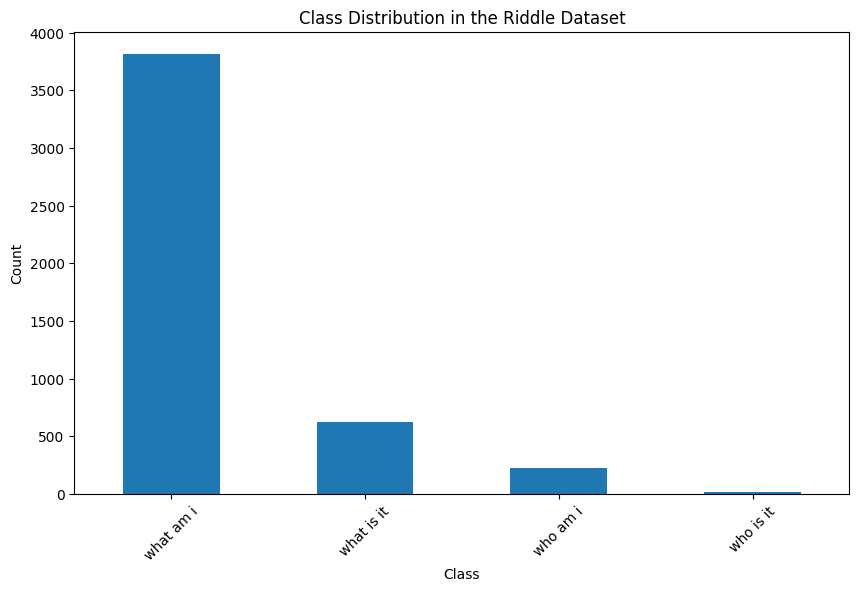

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame
df = pd.read_csv('rmt_combined.csv')

# Calculate class distribution
class_distribution = df['class'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution in the Riddle Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [18]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


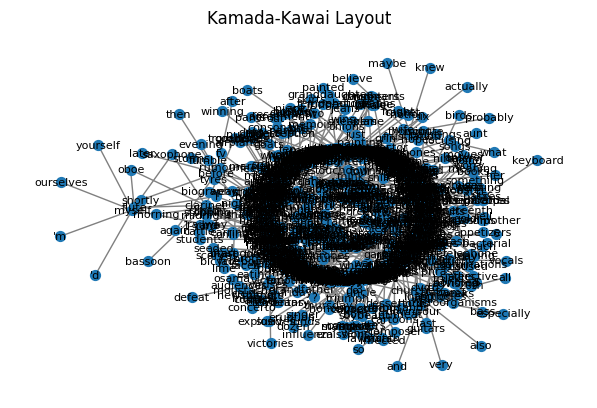

In [26]:

# Load your DataFrame with 'starter' and 'class' columns
df = pd.read_csv('rmt_combined.csv')

# Train or load word embeddings (Gensim Word2Vec model)
# Replace 'path_to_word2vec_model' with the path to your pre-trained word embeddings model

# Create a network graph
G = nx.Graph()

# Define a similarity threshold to consider related words
similarity_threshold = 0.7

# Iterate through starter words and find similar words as topics
for starter in df['starter'].unique():
    topics = []
    
    try:
        ws = glove_vectors.most_similar(starter)
        for word, score in ws:
            if score >= similarity_threshold:
                topics.append(word)
        for topic in topics:
            G.add_edge(starter, topic)
    except:
        continue

# Different layout options
layouts = {
    # 'Circular Layout': nx.circular_layout,
    'Kamada-Kawai Layout': nx.kamada_kawai_layout,
    # 'Fruchterman-Reingold Layout': nx.spring_layout,
    # 'Spectral Layout': nx.spectral_layout,
}

# Plot the graph using different layouts
plt.figure(figsize=(12, 8))

for layout_name, layout_function in layouts.items():
    pos = layout_function(G)
    plt.subplot(2, 2, list(layouts.keys()).index(layout_name) + 1)
    nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, font_color='black', edge_color='gray')
    plt.title(layout_name)

plt.tight_layout()
plt.show()



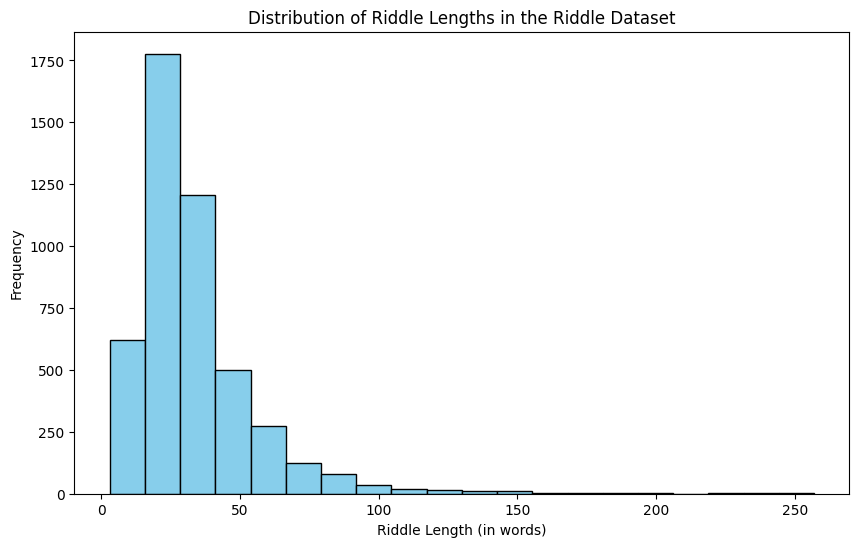

In [27]:
# Calculate riddle lengths in words
riddle_lengths = [len(list(nlp(riddle)))-1 for riddle in df['riddle']]  # Subtract 1 to exclude the question mark

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(riddle_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Riddle Lengths in the Riddle Dataset')
plt.xlabel('Riddle Length (in words)')
plt.ylabel('Frequency')
plt.show()